In [1]:
import pickle
import pandas as pd
import numpy as np
import datetime  
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import folium
from folium.plugins import HeatMap
from math import floor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix
from sqlalchemy import create_engine
from sqlalchemy import text
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN, OPTICS
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import csv
from shapely.geometry import Point, Polygon
import time
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
import dask.dataframe as dd
from sklearn.neighbors import KNeighborsClassifier
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
df = pd.read_csv('DOW_Taxi_Test.csv')
df

,Unnamed: 0,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips,total_flags
0,4,-73.982155,40.767937,17,3,0,50,82.0,0.0,2
1,9,-73.981796,40.768520,17,3,0,50,82.0,0.0,2
2,14,-73.982140,40.768028,17,3,0,50,82.0,0.0,2
3,19,-73.982353,40.768536,17,3,0,50,82.0,0.0,2
4,24,-73.982239,40.768452,17,3,0,50,82.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
1018246,3759285,-74.002769,40.760681,19,2,1,364,32.0,0.0,2
1018247,3759288,-73.966393,40.789322,14,4,2,296,30.0,0.0,2
1018248,3759289,-73.994904,40.765656,6,1,4,245,4.0,0.0,2
1018249,3759299,-73.984756,40.728607,14,4,1,379,41.0,0.0,2


In [3]:
df

,Unnamed: 0,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips,total_flags
0,4,-73.982155,40.767937,17,3,0,50,82.0,0.0,2
1,9,-73.981796,40.768520,17,3,0,50,82.0,0.0,2
2,14,-73.982140,40.768028,17,3,0,50,82.0,0.0,2
3,19,-73.982353,40.768536,17,3,0,50,82.0,0.0,2
4,24,-73.982239,40.768452,17,3,0,50,82.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
1018246,3759285,-74.002769,40.760681,19,2,1,364,32.0,0.0,2
1018247,3759288,-73.966393,40.789322,14,4,2,296,30.0,0.0,2
1018248,3759289,-73.994904,40.765656,6,1,4,245,4.0,0.0,2
1018249,3759299,-73.984756,40.728607,14,4,1,379,41.0,0.0,2


In [4]:
df = df.drop(columns=["Unnamed: 0","total_flags"])
df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips
0,-73.982155,40.767937,17,3,0,50,82.0,0.0
1,-73.981796,40.768520,17,3,0,50,82.0,0.0
2,-73.982140,40.768028,17,3,0,50,82.0,0.0
3,-73.982353,40.768536,17,3,0,50,82.0,0.0
4,-73.982239,40.768452,17,3,0,50,82.0,0.0
...,...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0,0.0
1018247,-73.966393,40.789322,14,4,2,296,30.0,0.0
1018248,-73.994904,40.765656,6,1,4,245,4.0,0.0
1018249,-73.984756,40.728607,14,4,1,379,41.0,0.0


In [5]:
columns = ['total_weekday_trips', 'total_weekday_trips']

for column in columns:
    df[column] = df[column].fillna(0)

In [6]:
df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips
0,-73.982155,40.767937,17,3,0,50,82.0,0.0
1,-73.981796,40.768520,17,3,0,50,82.0,0.0
2,-73.982140,40.768028,17,3,0,50,82.0,0.0
3,-73.982353,40.768536,17,3,0,50,82.0,0.0
4,-73.982239,40.768452,17,3,0,50,82.0,0.0
...,...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0,0.0
1018247,-73.966393,40.789322,14,4,2,296,30.0,0.0
1018248,-73.994904,40.765656,6,1,4,245,4.0,0.0
1018249,-73.984756,40.728607,14,4,1,379,41.0,0.0


In [7]:
weekday_df = df[df["Day of Week"].isin([0, 1, 2, 3, 4])].copy()

print(weekday_df.shape)

(729764, 8)


In [8]:
weekday_df = weekday_df.drop_duplicates(subset=["longitude","latitude","Hour","Day of Week","cluster_id","total_weekday_trips"])

In [9]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips
0,-73.982155,40.767937,17,3,0,50,82.0,0.0
1,-73.981796,40.768520,17,3,0,50,82.0,0.0
2,-73.982140,40.768028,17,3,0,50,82.0,0.0
3,-73.982353,40.768536,17,3,0,50,82.0,0.0
4,-73.982239,40.768452,17,3,0,50,82.0,0.0
...,...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0,0.0
1018247,-73.966393,40.789322,14,4,2,296,30.0,0.0
1018248,-73.994904,40.765656,6,1,4,245,4.0,0.0
1018249,-73.984756,40.728607,14,4,1,379,41.0,0.0


In [10]:
weekday_df = weekday_df.drop(columns=["total_weekend_trips"])
weekday_df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips
0,-73.982155,40.767937,17,3,0,50,82.0
1,-73.981796,40.768520,17,3,0,50,82.0
2,-73.982140,40.768028,17,3,0,50,82.0
3,-73.982353,40.768536,17,3,0,50,82.0
4,-73.982239,40.768452,17,3,0,50,82.0
...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0
1018247,-73.966393,40.789322,14,4,2,296,30.0
1018248,-73.994904,40.765656,6,1,4,245,4.0
1018249,-73.984756,40.728607,14,4,1,379,41.0


***

## Model Testing

In [11]:
bins = [0,20,40,60,80,np.inf]

In [12]:
labels = [0,1,2,3,4]

In [13]:
weekday_df["Taxi_Trips_Busyness"] = pd.cut(weekday_df["total_weekday_trips"], bins=bins, labels=labels)

In [14]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,Taxi_Trips_Busyness
0,-73.982155,40.767937,17,3,0,50,82.0,4
1,-73.981796,40.768520,17,3,0,50,82.0,4
2,-73.982140,40.768028,17,3,0,50,82.0,4
3,-73.982353,40.768536,17,3,0,50,82.0,4
4,-73.982239,40.768452,17,3,0,50,82.0,4
...,...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0,1
1018247,-73.966393,40.789322,14,4,2,296,30.0,1
1018248,-73.994904,40.765656,6,1,4,245,4.0,0
1018249,-73.984756,40.728607,14,4,1,379,41.0,2


In [15]:
busyness_counts = weekday_df['Taxi_Trips_Busyness'].value_counts().sort_index()

print(busyness_counts)

Taxi_Trips_Busyness
0     51655
1    233740
2    250510
3    119856
4     74003
Name: count, dtype: int64


In [16]:
X = weekday_df[["longitude","latitude","Hour","Day of Week"]]
y = weekday_df["Taxi_Trips_Busyness"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:
model.fit(X_train, y_train.astype('int'))

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [22]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# R-squared Score
r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)

Mean Absolute Error: 0.06411638423240305
Mean Squared Error: 0.0869638697300507
Root Mean Squared Error: 0.294896371171384
R-squared Score: 0.9250647236515578


In [23]:
start_time = time.time()

rf_model = RandomForestClassifier(random_state=42)
rf_model = rf_model.fit(X_train, y_train)
end_time = time.time()
rf_time = end_time - start_time
print(f"Time taken to train Random Forest model : {rf_time} seconds")

Time taken to train Random Forest model : 69.26437401771545 seconds


In [24]:
predicted_values = rf_model.predict(X_test)

In [25]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values})
print(predictions)

       Actual  Predicted
151164      0          0
866985      1          1
449235      4          4
214002      2          2
430521      0          0
...       ...        ...
659952      2          2
722962      1          1
723802      2          2
842899      1          1
78115       2          2

[218930 rows x 2 columns]


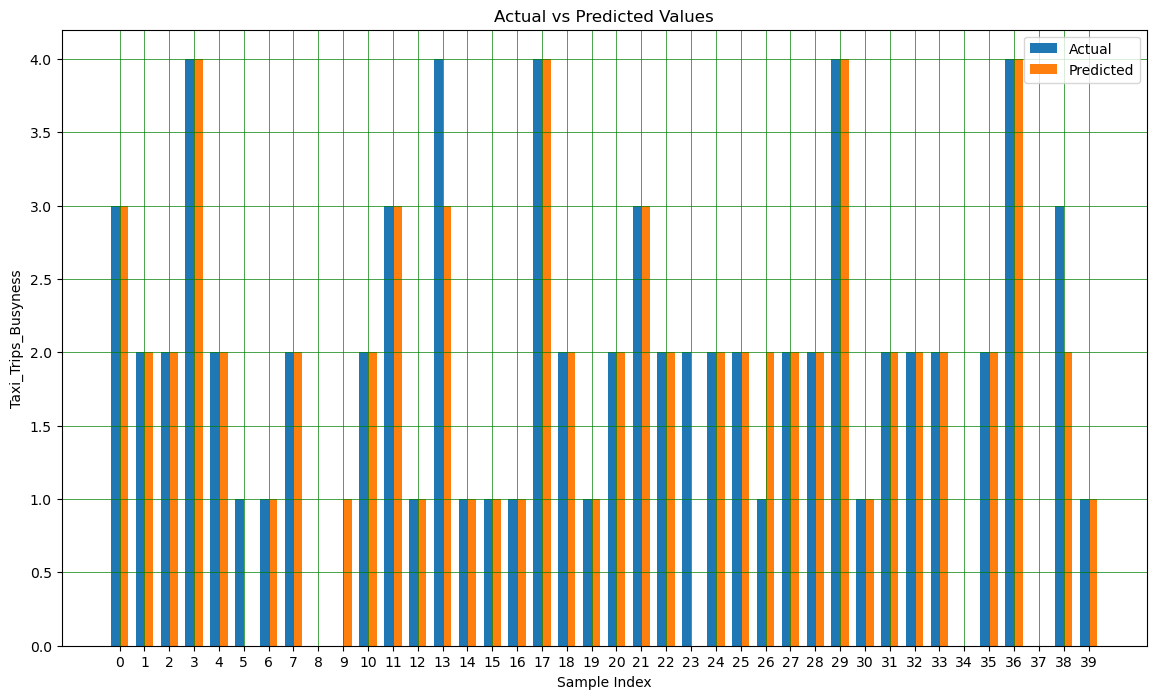

In [26]:
# Sample and reset index
predictions_sample = predictions.sample(40).reset_index(drop=True)

# Create an appropriate range for the x-axis
x = np.arange(len(predictions_sample))

# Define bar width
bar_width = 0.35

# Create subplots
fig, ax = plt.subplots(figsize=(14,8))

# Generate bars for actual and predicted values
rects1 = ax.bar(x - bar_width/2, predictions_sample['Actual'], bar_width, label='Actual')
rects2 = ax.bar(x + bar_width/2, predictions_sample['Predicted'], bar_width, label='Predicted')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Sample Index')
ax.set_ylabel('Taxi_Trips_Busyness')
ax.set_title('Actual vs Predicted Values')
ax.set_xticks(x)
ax.legend()

plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [27]:
print("Random Forest Classifier Report: \n", classification_report(y_test, predicted_values))

Random Forest Classifier Report: 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     15519
           1       0.93      0.95      0.94     69964
           2       0.95      0.96      0.95     75343
           3       0.96      0.95      0.96     36128
           4       0.97      0.97      0.97     21976

    accuracy                           0.95    218930
   macro avg       0.95      0.93      0.94    218930
weighted avg       0.95      0.95      0.95    218930



In [28]:
importances = model.feature_importances_

In [29]:
feature_importances = pd.DataFrame({"feature": X.columns, "importance": importances})
feature_importances = feature_importances.sort_values("importance", ascending=False)

In [30]:
print(feature_importances)

       feature  importance
1     latitude    0.357541
0    longitude    0.337540
2         Hour    0.182670
3  Day of Week    0.122248


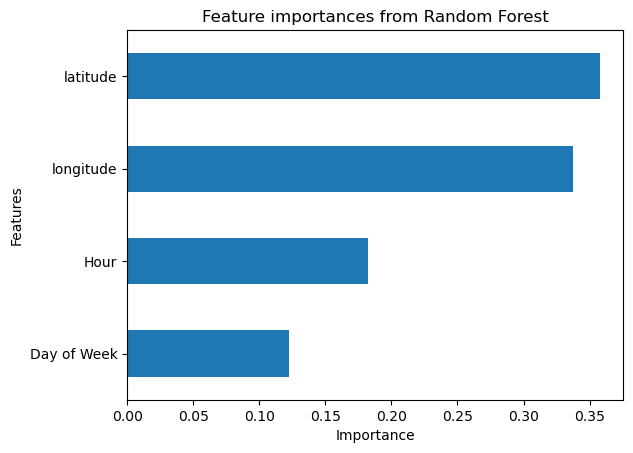

In [31]:
feature_importances.set_index('feature', inplace=True)
feature_importances.sort_values(by="importance", ascending=True, inplace=True)

feature_importances.plot(kind='barh', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature importances from Random Forest')
plt.show()

***

## Testing Other Models

## Decision Tree Classifier

In [32]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Classifier Report: \n", classification_report(y_test, dt_predictions))

Decision Tree Classifier Report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83     15519
           1       0.89      0.90      0.90     69964
           2       0.91      0.91      0.91     75343
           3       0.91      0.91      0.91     36128
           4       0.94      0.94      0.94     21976

    accuracy                           0.90    218930
   macro avg       0.90      0.90      0.90    218930
weighted avg       0.90      0.90      0.90    218930



## K-Nearest Neighbors Classifier

In [33]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbors Classifier Report: \n", classification_report(y_test, knn_predictions))

K-Nearest Neighbors Classifier Report: 
               precision    recall  f1-score   support

           0       0.92      0.76      0.83     15519
           1       0.93      0.93      0.93     69964
           2       0.93      0.95      0.94     75343
           3       0.93      0.96      0.95     36128
           4       0.94      0.97      0.96     21976

    accuracy                           0.93    218930
   macro avg       0.93      0.91      0.92    218930
weighted avg       0.93      0.93      0.93    218930



## Incorporate more binning values and change to regressional approach

In [34]:
# Create binning values for 50 noise complaint categories to ensure equal distributions 
weekday_df["Taxi_Trips_Busyness"] = pd.qcut(weekday_df["total_weekday_trips"], q=50, labels=False, duplicates='drop')

In [35]:
test = weekday_df["Taxi_Trips_Busyness"]

In [36]:
test.value_counts()

Taxi_Trips_Busyness
10    26467
29    26190
34    21133
39    21081
6     19313
36    18010
5     17529
37    16498
4     15770
42    15730
2     15678
44    15301
0     15137
18    14868
17    14776
1     14677
46    14579
20    14544
48    14520
13    14318
49    14302
19    14269
25    14158
21    14157
23    14117
14    14006
47    13993
15    13910
43    13881
22    13876
12    13849
24    13821
16    13765
26    13649
45    13539
28    13376
11    13362
3     13322
27    12774
9     12533
40    12217
30    12203
32    11905
31    11671
41    11292
7     11273
8     10842
33    10782
35     9149
38     7652
Name: count, dtype: int64

In [37]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,Taxi_Trips_Busyness
0,-73.982155,40.767937,17,3,0,50,82.0,45
1,-73.981796,40.768520,17,3,0,50,82.0,45
2,-73.982140,40.768028,17,3,0,50,82.0,45
3,-73.982353,40.768536,17,3,0,50,82.0,45
4,-73.982239,40.768452,17,3,0,50,82.0,45
...,...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0,10
1018247,-73.966393,40.789322,14,4,2,296,30.0,9
1018248,-73.994904,40.765656,6,1,4,245,4.0,0
1018249,-73.984756,40.728607,14,4,1,379,41.0,19


In [38]:
test = weekday_df[weekday_df["Taxi_Trips_Busyness"] == 49]

In [39]:
test

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,Taxi_Trips_Busyness
133,-73.994560,40.750526,7,3,4,65,213.0,49
134,-73.993958,40.751446,7,3,4,65,213.0,49
135,-73.993950,40.751354,7,3,4,65,213.0,49
136,-73.993950,40.751297,7,3,4,65,213.0,49
137,-73.994240,40.751011,7,3,4,65,213.0,49
...,...,...,...,...,...,...,...,...
1011145,-73.966553,40.804085,8,5,3,278,140.0,49
1011328,-73.979691,40.743053,20,2,1,470,142.0,49
1011329,-73.980080,40.742447,20,2,1,470,142.0,49
1013173,-73.986122,40.718098,8,6,2,217,128.0,49


In [40]:
test["Hour"].value_counts()

Hour
7     3109
8     1685
6     1643
9     1203
10    1092
21    1085
19     831
22     810
11     702
18     635
12     533
13     314
20     238
23     209
14     110
15     103
Name: count, dtype: int64

In [41]:
weekday_df["Taxi_Trips_Busyness"].nunique()

50

## Merge with Crime Output 

In [42]:
crime_data = pd.read_csv("../Crime_Data_Model.csv")
crime_data

,Unnamed: 0,Latitude,Longitude,Hour,DayOfWeek,Cluster,CrimeCount_binned_regression
0,0,40.737203,-73.983273,3,6,20,0.533333
1,1,40.800930,-73.941098,22,4,307,0.466667
2,2,40.765024,-73.984836,2,6,364,0.533333
3,3,40.828623,-73.943849,20,1,33,0.533333
4,4,40.851213,-73.935216,22,5,413,0.266667
...,...,...,...,...,...,...,...
31240,31240,40.840781,-73.936245,17,2,445,0.866667
31241,31241,40.737203,-73.983273,22,3,451,0.333333
31242,31242,40.815913,-73.945149,15,0,222,0.666667
31243,31243,40.828623,-73.943849,17,4,81,0.866667


In [43]:
crime_data = crime_data.drop(columns=["Unnamed: 0"])
crime_data

,Latitude,Longitude,Hour,DayOfWeek,Cluster,CrimeCount_binned_regression
0,40.737203,-73.983273,3,6,20,0.533333
1,40.800930,-73.941098,22,4,307,0.466667
2,40.765024,-73.984836,2,6,364,0.533333
3,40.828623,-73.943849,20,1,33,0.533333
4,40.851213,-73.935216,22,5,413,0.266667
...,...,...,...,...,...,...
31240,40.840781,-73.936245,17,2,445,0.866667
31241,40.737203,-73.983273,22,3,451,0.333333
31242,40.815913,-73.945149,15,0,222,0.666667
31243,40.828623,-73.943849,17,4,81,0.866667


In [44]:
crime_data = crime_data.rename(columns={'DayOfWeek': 'Day of Week'})
crime_data

,Latitude,Longitude,Hour,Day of Week,Cluster,CrimeCount_binned_regression
0,40.737203,-73.983273,3,6,20,0.533333
1,40.800930,-73.941098,22,4,307,0.466667
2,40.765024,-73.984836,2,6,364,0.533333
3,40.828623,-73.943849,20,1,33,0.533333
4,40.851213,-73.935216,22,5,413,0.266667
...,...,...,...,...,...,...
31240,40.840781,-73.936245,17,2,445,0.866667
31241,40.737203,-73.983273,22,3,451,0.333333
31242,40.815913,-73.945149,15,0,222,0.666667
31243,40.828623,-73.943849,17,4,81,0.866667


In [45]:
crime_data["CrimeCount_binned_regression"].nunique()

15

In [46]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,cluster_id,total_weekday_trips,Taxi_Trips_Busyness
0,-73.982155,40.767937,17,3,0,50,82.0,45
1,-73.981796,40.768520,17,3,0,50,82.0,45
2,-73.982140,40.768028,17,3,0,50,82.0,45
3,-73.982353,40.768536,17,3,0,50,82.0,45
4,-73.982239,40.768452,17,3,0,50,82.0,45
...,...,...,...,...,...,...,...,...
1018246,-74.002769,40.760681,19,2,1,364,32.0,10
1018247,-73.966393,40.789322,14,4,2,296,30.0,9
1018248,-73.994904,40.765656,6,1,4,245,4.0,0
1018249,-73.984756,40.728607,14,4,1,379,41.0,19


In [47]:
weekday_df['Taxi_Trips_Busyness'].nunique()

50

In [48]:
weekday_df = weekday_df.rename(columns={'cluster_id': 'Cluster'})

In [49]:
merged_df = weekday_df.merge(crime_data, on=['Day of Week', 'Hour', 'Cluster'], how='left')

In [50]:
merged_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Taxi_Trips_Busyness,Latitude,Longitude,CrimeCount_binned_regression
0,-73.982155,40.767937,17,3,0,50,82.0,45,NaN,NaN,NaN
1,-73.981796,40.768520,17,3,0,50,82.0,45,NaN,NaN,NaN
2,-73.982140,40.768028,17,3,0,50,82.0,45,NaN,NaN,NaN
3,-73.982353,40.768536,17,3,0,50,82.0,45,NaN,NaN,NaN
4,-73.982239,40.768452,17,3,0,50,82.0,45,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
991071,-74.002769,40.760681,19,2,1,364,32.0,10,NaN,NaN,NaN
991072,-73.966393,40.789322,14,4,2,296,30.0,9,NaN,NaN,NaN
991073,-73.994904,40.765656,6,1,4,245,4.0,0,40.840781,-73.936245,0.0
991074,-73.984756,40.728607,14,4,1,379,41.0,19,NaN,NaN,NaN


In [51]:
merged_df = merged_df.drop(columns=["Latitude","Longitude"])
merged_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Taxi_Trips_Busyness,CrimeCount_binned_regression
0,-73.982155,40.767937,17,3,0,50,82.0,45,NaN
1,-73.981796,40.768520,17,3,0,50,82.0,45,NaN
2,-73.982140,40.768028,17,3,0,50,82.0,45,NaN
3,-73.982353,40.768536,17,3,0,50,82.0,45,NaN
4,-73.982239,40.768452,17,3,0,50,82.0,45,NaN
...,...,...,...,...,...,...,...,...,...
991071,-74.002769,40.760681,19,2,1,364,32.0,10,NaN
991072,-73.966393,40.789322,14,4,2,296,30.0,9,NaN
991073,-73.994904,40.765656,6,1,4,245,4.0,0,0.0
991074,-73.984756,40.728607,14,4,1,379,41.0,19,NaN


In [52]:
merged_df["Taxi_Trips_Busyness_Regression"] = merged_df["Taxi_Trips_Busyness"] / 50

In [53]:
merged_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Taxi_Trips_Busyness,CrimeCount_binned_regression,Taxi_Trips_Busyness_Regression
0,-73.982155,40.767937,17,3,0,50,82.0,45,NaN,0.90
1,-73.981796,40.768520,17,3,0,50,82.0,45,NaN,0.90
2,-73.982140,40.768028,17,3,0,50,82.0,45,NaN,0.90
3,-73.982353,40.768536,17,3,0,50,82.0,45,NaN,0.90
4,-73.982239,40.768452,17,3,0,50,82.0,45,NaN,0.90
...,...,...,...,...,...,...,...,...,...,...
991071,-74.002769,40.760681,19,2,1,364,32.0,10,NaN,0.20
991072,-73.966393,40.789322,14,4,2,296,30.0,9,NaN,0.18
991073,-73.994904,40.765656,6,1,4,245,4.0,0,0.0,0.00
991074,-73.984756,40.728607,14,4,1,379,41.0,19,NaN,0.38


In [54]:
merged_df['CrimeCount_binned_regression'] = merged_df['CrimeCount_binned_regression'].fillna(0)

In [55]:
def combine_scores(row):
    if row['CrimeCount_binned_regression'] > 0.4:
        return np.mean([row['Taxi_Trips_Busyness_Regression'], row['CrimeCount_binned_regression']])
    else:
        return row['Taxi_Trips_Busyness_Regression']

In [56]:
merged_df['Combined_Score'] = merged_df.apply(combine_scores, axis=1)

In [57]:
merged_df['Combined_Score'] = merged_df[['Taxi_Trips_Busyness_Regression', 'CrimeCount_binned_regression']].max(axis=1)

In [58]:
merged_df['Normalized_Score'] = merged_df['Combined_Score'] / merged_df['Combined_Score'].max()

In [59]:
merged_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Taxi_Trips_Busyness,CrimeCount_binned_regression,Taxi_Trips_Busyness_Regression,Combined_Score,Normalized_Score
0,-73.982155,40.767937,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
1,-73.981796,40.768520,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
2,-73.982140,40.768028,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
3,-73.982353,40.768536,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
4,-73.982239,40.768452,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
...,...,...,...,...,...,...,...,...,...,...,...,...
991071,-74.002769,40.760681,19,2,1,364,32.0,10,0.0,0.20,0.20,0.204082
991072,-73.966393,40.789322,14,4,2,296,30.0,9,0.0,0.18,0.18,0.183673
991073,-73.994904,40.765656,6,1,4,245,4.0,0,0.0,0.00,0.00,0.000000
991074,-73.984756,40.728607,14,4,1,379,41.0,19,0.0,0.38,0.38,0.387755


In [60]:
merged_df["Normalized_Score"].value_counts()

Normalized_Score
0.204082    31934
0.591837    30925
0.816327    30835
0.795918    28321
0.693878    26460
0.612245    25011
0.408163    24718
0.734694    23889
0.755102    21776
0.857143    21510
0.680272    21457
0.897959    21190
0.959184    20040
0.952381    19913
0.122449    19283
0.877551    18137
0.530612    17923
0.918367    17868
0.938776    17614
0.551020    17458
0.979592    17077
0.102041    16956
0.489796    16956
0.346939    16938
0.836735    16864
0.428571    16658
1.000000    16598
0.367347    16573
0.510204    16523
0.469388    16455
0.571429    16280
0.448980    16164
0.387755    15970
0.081633    15438
0.265306    15219
0.306122    15089
0.040816    15061
0.285714    15025
0.653061    14967
0.326531    14813
0.000000    14755
0.244898    14422
0.020408    14098
0.224490    13841
0.632653    13525
0.884354    13321
0.673469    13258
0.183673    12900
0.061224    12876
0.142857    11441
0.163265    11005
0.714286    10851
0.544218    10800
0.775510     9718
0.476190   

In [61]:
merged_df["Normalized_Score"].nunique()

60

In [62]:
weekday_df = merged_df

In [63]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Taxi_Trips_Busyness,CrimeCount_binned_regression,Taxi_Trips_Busyness_Regression,Combined_Score,Normalized_Score
0,-73.982155,40.767937,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
1,-73.981796,40.768520,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
2,-73.982140,40.768028,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
3,-73.982353,40.768536,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
4,-73.982239,40.768452,17,3,0,50,82.0,45,0.0,0.90,0.90,0.918367
...,...,...,...,...,...,...,...,...,...,...,...,...
991071,-74.002769,40.760681,19,2,1,364,32.0,10,0.0,0.20,0.20,0.204082
991072,-73.966393,40.789322,14,4,2,296,30.0,9,0.0,0.18,0.18,0.183673
991073,-73.994904,40.765656,6,1,4,245,4.0,0,0.0,0.00,0.00,0.000000
991074,-73.984756,40.728607,14,4,1,379,41.0,19,0.0,0.38,0.38,0.387755


In [64]:
weekday_df = weekday_df.drop(columns=['Taxi_Trips_Busyness','CrimeCount_binned_regression','Taxi_Trips_Busyness_Regression','Combined_Score'])

In [65]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Normalized_Score
0,-73.982155,40.767937,17,3,0,50,82.0,0.918367
1,-73.981796,40.768520,17,3,0,50,82.0,0.918367
2,-73.982140,40.768028,17,3,0,50,82.0,0.918367
3,-73.982353,40.768536,17,3,0,50,82.0,0.918367
4,-73.982239,40.768452,17,3,0,50,82.0,0.918367
...,...,...,...,...,...,...,...,...
991071,-74.002769,40.760681,19,2,1,364,32.0,0.204082
991072,-73.966393,40.789322,14,4,2,296,30.0,0.183673
991073,-73.994904,40.765656,6,1,4,245,4.0,0.000000
991074,-73.984756,40.728607,14,4,1,379,41.0,0.387755


In [66]:
weekday_df = weekday_df.drop_duplicates(subset=["latitude","longitude","Hour","Day of Week","Cluster"], keep='last')

In [67]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Normalized_Score
0,-73.982155,40.767937,17,3,0,50,82.0,0.918367
1,-73.981796,40.768520,17,3,0,50,82.0,0.918367
2,-73.982140,40.768028,17,3,0,50,82.0,0.918367
3,-73.982353,40.768536,17,3,0,50,82.0,0.918367
4,-73.982239,40.768452,17,3,0,50,82.0,0.918367
...,...,...,...,...,...,...,...,...
991071,-74.002769,40.760681,19,2,1,364,32.0,0.204082
991072,-73.966393,40.789322,14,4,2,296,30.0,0.183673
991073,-73.994904,40.765656,6,1,4,245,4.0,0.000000
991074,-73.984756,40.728607,14,4,1,379,41.0,0.387755


***

## Create the Model for Regression Capabilities

In [68]:
weekday_df

,longitude,latitude,Hour,Month,Day of Week,Cluster,total_weekday_trips,Normalized_Score
0,-73.982155,40.767937,17,3,0,50,82.0,0.918367
1,-73.981796,40.768520,17,3,0,50,82.0,0.918367
2,-73.982140,40.768028,17,3,0,50,82.0,0.918367
3,-73.982353,40.768536,17,3,0,50,82.0,0.918367
4,-73.982239,40.768452,17,3,0,50,82.0,0.918367
...,...,...,...,...,...,...,...,...
991071,-74.002769,40.760681,19,2,1,364,32.0,0.204082
991072,-73.966393,40.789322,14,4,2,296,30.0,0.183673
991073,-73.994904,40.765656,6,1,4,245,4.0,0.000000
991074,-73.984756,40.728607,14,4,1,379,41.0,0.387755


In [69]:
weekday_df["Normalized_Score"]

0         0.918367
1         0.918367
2         0.918367
3         0.918367
4         0.918367
            ...   
991071    0.204082
991072    0.183673
991073    0.000000
991074    0.387755
991075    0.020408
Name: Normalized_Score, Length: 729764, dtype: float64

***

## Model Building and Testing

In [70]:
X = weekday_df[["longitude","latitude","Hour","Day of Week"]]
y = weekday_df["Normalized_Score"]

#### May be beneficial to test the accuracy of other models to train the most optimal solution for our application

In [71]:
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

In [72]:
metrics = {
    "Model": [],
    "RMSE": [],
    "R-squared": [],
    "MAE": [],
    "Training time": []
}

for model_name, model in models.items():
    start = time.time()
    
    model.fit(X_train, y_train)
    
    end = time.time()
    
    model_time = end - start
    
    y_pred = model.predict(X_test)
    
    model_rmse = sqrt(mean_squared_error(y_test, y_pred))
    model_r2 = r2_score(y_test, y_pred)
    model_mae = mean_absolute_error(y_test, y_pred)
    
    metrics["Model"].append(model_name)
    metrics["RMSE"].append(model_rmse)
    metrics["R-squared"].append(model_r2)
    metrics["MAE"].append(model_mae)
    metrics["Training time"].append(model_time)
    
    print(f"{model_name}:\n- RMSE: {model_rmse}\n- R-squared: {model_r2}\n- MAE: {model_mae}\n- Training time: {model_time}\n")

Ridge:
- RMSE: 1.0513696251631988
- R-squared: 0.04751464252275761
- MAE: 0.8396678417504293
- Training time: 0.03686881065368652

Lasso:
- RMSE: 1.0689452623501956
- R-squared: 0.015403267840547574
- MAE: 0.8391134438953125
- Training time: 0.039051055908203125

Decision Tree:
- RMSE: 0.3855400344524855
- R-squared: 0.8719184955653656
- MAE: 0.11488603663271366
- Training time: 1.6407721042633057

Random Forest:
- RMSE: 0.27899919672740964
- R-squared: 0.9329261303982113
- MAE: 0.14048800986616725
- Training time: 113.022292137146

Gradient Boosting:
- RMSE: 0.8731615342485904
- R-squared: 0.34304344992824565
- MAE: 0.7066301292167064
- Training time: 29.857545852661133



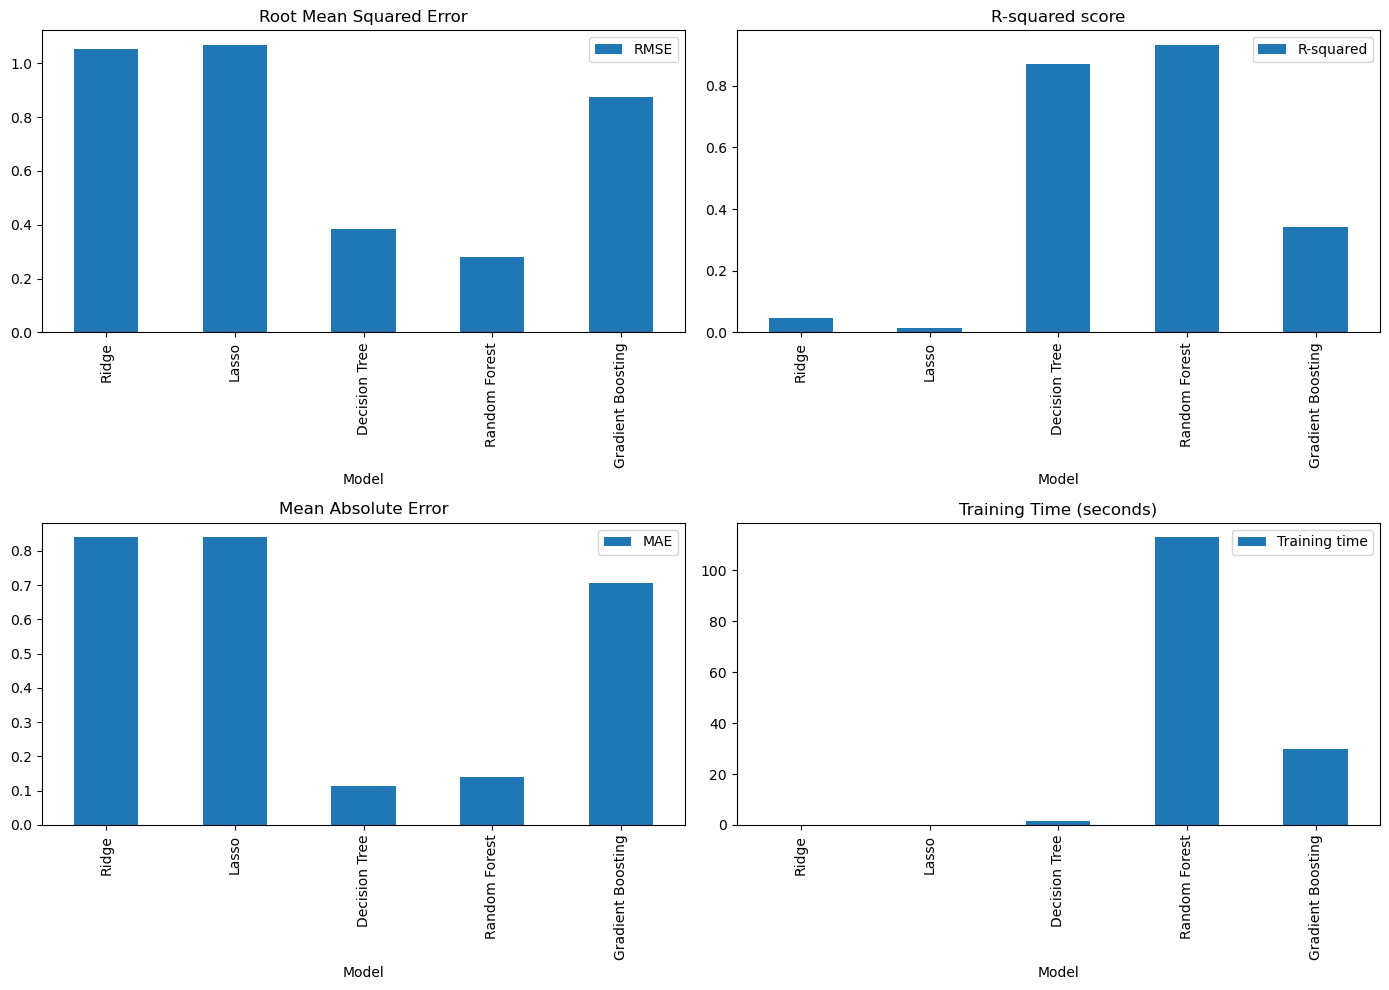

In [73]:
metrics_df = pd.DataFrame(metrics)

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

metrics_df.plot(x="Model", y="RMSE", kind="bar", ax=ax[0, 0])
ax[0, 0].set_title("Root Mean Squared Error")

metrics_df.plot(x="Model", y="R-squared", kind="bar", ax=ax[0, 1])
ax[0, 1].set_title("R-squared score")

metrics_df.plot(x="Model", y="MAE", kind="bar", ax=ax[1, 0])
ax[1, 0].set_title("Mean Absolute Error")

metrics_df.plot(x="Model", y="Training time", kind="bar", ax=ax[1, 1])
ax[1, 1].set_title("Training Time (seconds)")

plt.tight_layout()
plt.show()

#### Evident to see from the above metrics suggest that the Random Forest Regressor, as well as the Classifier model previously, is the most accurate model for our approach to modelling

#### While saying this however, there is a huge contrast between the training time of the Random Forest Regressor and the Decision Tree Regressor - With this being said, I have decided to use the Decision Tree Regressor to enhance the performance based off runtime
* Below is the approach and further analysis of the model to ensure we have made the correct choice

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
dt_model = DecisionTreeRegressor(random_state=36)

In [76]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=36)

In [77]:
y_pred = dt_model.predict(X_test)

In [78]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [79]:
print("Decision Tree - Root Mean Squared Error (RMSE):", rmse)
print("Decision Tree - R-squared score:", r2)
print("Decision Tree - Mean absolute error:", mae)

Decision Tree - Root Mean Squared Error (RMSE): 0.09373967408642983
Decision Tree - R-squared score: 0.8986585600140786
Decision Tree - Mean absolute error: 0.02796352623253854


In [80]:
start_time = time.time()

dt_model = DecisionTreeRegressor(random_state=36)
dt_model = dt_model.fit(X_train, y_train)

end_time = time.time()

dt_time = end_time - start_time
print(f"Time taken to train Random Forest model : {dt_time} seconds")

Time taken to train Random Forest model : 2.013148307800293 seconds


In [81]:
predictions = dt_model.predict(X_test)

In [82]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print(df1)

          Actual  Predicted
0       0.000000   0.448980
1       0.285714   0.224490
2       0.938776   0.938776
3       0.428571   0.428571
4       0.040816   0.040816
...          ...        ...
145948  0.061224   0.061224
145949  0.122449   0.122449
145950  0.551020   0.551020
145951  0.959184   0.959184
145952  0.653061   0.653061

[145953 rows x 2 columns]


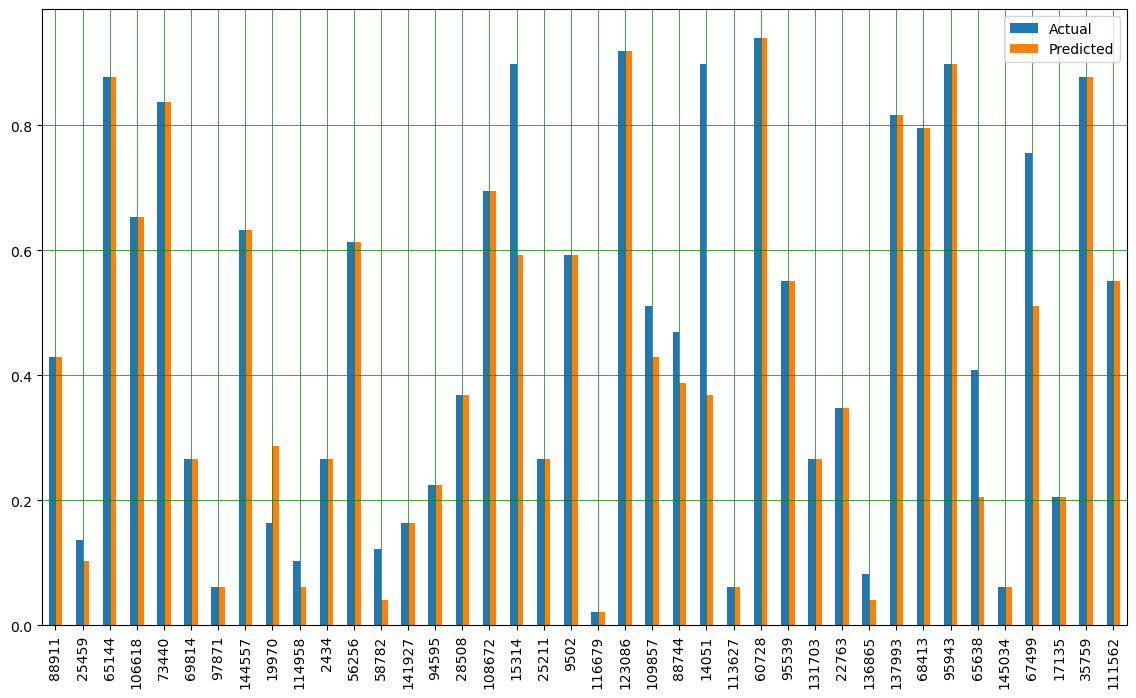

In [83]:
df1.sample(40).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

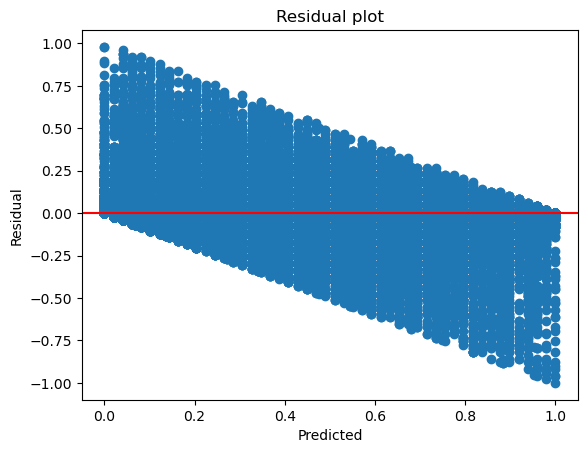

In [84]:
y_pred = dt_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.show()

In [85]:
importances = list(dt_model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

In [86]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: longitude            Importance: 0.34
Variable: latitude             Importance: 0.34
Variable: Hour                 Importance: 0.24
Variable: Day of Week          Importance: 0.08


In [87]:
perm = PermutationImportance(dt_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.7684 ± 0.0068,latitude
1.6853 ± 0.0062,longitude
1.1053 ± 0.0045,Hour
0.2618 ± 0.0034,Day of Week


## Check for Deep Learning and Geospatial Models

In [ ]:
from mgwr.gwr import GWR
import tensorflow as tf

In [ ]:
metrics = {
    "Model": [],
    "RMSE": [],
    "R-squared": [],
    "MAE": [],
    "Training time": []
}

In [ ]:
# 1. Feed-forward Neural Network:
start = time.time()

In [ ]:
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_nn.compile(optimizer='adam', loss='mse')
model_nn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
y_pred_nn = model_nn.predict(X_test).flatten()

end = time.time()

metrics["Model"].append("Feed-forward NN")
metrics["RMSE"].append(sqrt(mean_squared_error(y_test, y_pred_nn)))
metrics["R-squared"].append(r2_score(y_test, y_pred_nn))
metrics["MAE"].append(mean_absolute_error(y_test, y_pred_nn))
metrics["Training time"].append(end - start)

### Run a basic test

In [96]:
X_test = [[-73.999474, 40.734135, 11, 2]] # replace this with actual test data
y_test = [0.7] # replace this with actual test data

In [97]:
y_pred = dt_model.predict(X_test)

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [98]:
print("Predicted output:", y_pred)

Predicted output: [0.59183673]


## Final test against the more accurate Random Forest Regressor

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
rf_model = RandomForestRegressor(n_estimators = 5, random_state = 42)

In [101]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

In [102]:
y_pred = rf_model.predict(X_test)

In [103]:
predictions = rf_model.predict(X_test)

In [104]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print(df1)

          Actual  Predicted
0       0.000000   0.000000
1       0.285714   0.261224
2       0.938776   0.938776
3       0.428571   0.428571
4       0.040816   0.040816
...          ...        ...
145948  0.061224   0.102041
145949  0.122449   0.187755
145950  0.551020   0.551020
145951  0.959184   0.959184
145952  0.653061   0.653061

[145953 rows x 2 columns]


In [105]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [106]:
print("Random Forest - Root Mean Squared Error (RMSE):", rmse)
print("Random Forest - R-squared score:", r2)
print("Random Forest - Mean absolute error:", mae)

Random Forest - Root Mean Squared Error (RMSE): 0.0774116878612497
Random Forest - R-squared score: 0.9308880310147118
Random Forest - Mean absolute error: 0.03490828353979018


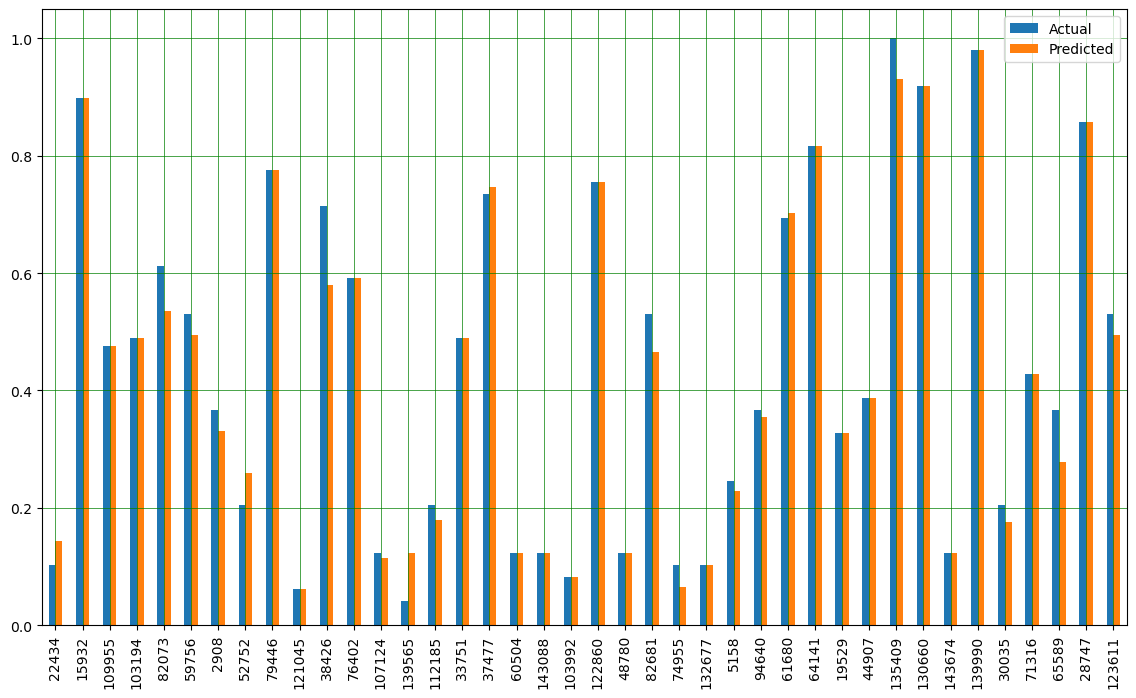

In [107]:
df1.sample(40).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

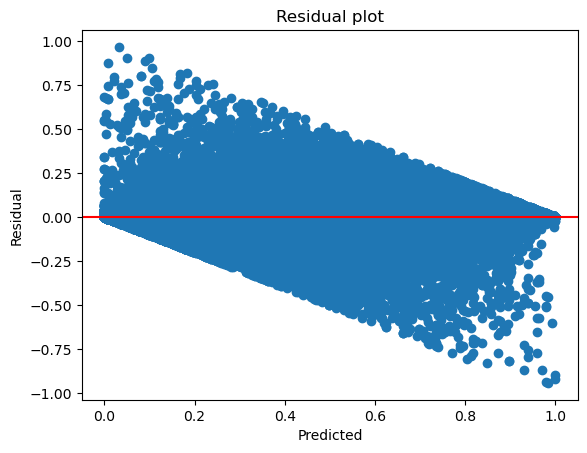

In [108]:
y_pred = rf_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.show()

In [109]:
importances = list(rf_model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

In [110]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: latitude             Importance: 0.35
Variable: longitude            Importance: 0.34
Variable: Hour                 Importance: 0.23
Variable: Day of Week          Importance: 0.08


In [111]:
perm = PermutationImportance(rf_model, random_state=1).fit(X_test, y_test)
eli5.show_weights( perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.6063 ± 0.0067,latitude
1.5259 ± 0.0056,longitude
1.0643 ± 0.0026,Hour
0.2396 ± 0.0023,Day of Week


## Create pkl file with RF model

In [ ]:
pkl_filename = "rf_weekday_model_noweather_crime.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_model, file)

## Create a CSV file for backend rendering

In [ ]:
weekday_df

In [ ]:
weekday_df.to_csv("Final_Weekday_Model_Data_NoWeather_Crime.csv")